In [1]:
import pandas as pd
import numpy as np
from os import listdir

In [2]:
range_px = 308 
px_size = 0.1625

directory = 'baz_pc//'
#directory = 'baz_ooplasm//'
#directory = 'par1_pc//'
#directory = 'par1_baz_pc//'
files = listdir(directory)

In [3]:
def euc_dist(a,b):
    return np.linalg.norm(a-b)

def find_min_distance(df):
    refrence_coordinates = df[0:1]
    df = df[1:]
    df["distances"] = df.apply(lambda row : euc_dist(row, refrence_coordinates), axis = 1)
    return min(df.distances), df.distances.idxmin()


def concatanate_data(df_profile_all, df_profile_norm_all, df_profile, df_distances, range, colname):
    position_pc = find_min_distance(df_distances)[1]
    df_profile = df_profile[(position_pc-range):(position_pc+range)]
    df_profile.reset_index(drop=True, inplace=True)
    df_profile_all[colname] = df_profile
    df_profile_norm_all[colname] = (df_profile-min(df_profile))/max(df_profile-min(df_profile))
    return df_profile_all, df_profile_norm_all

In [4]:
## when only one channel per image is measured
increment = 4   

## when two channels per image are measured
#increment = 6   
#timepoint = 0   #after
#timepoint = 3  #before


profile_first_all = pd.DataFrame()
profile_second_all = pd.DataFrame()
profile_first_all_normalized = pd.DataFrame()
profile_second_all_normalized = pd.DataFrame()

for ind, file in enumerate(files[0::increment]):

    if increment == 6:
        xy_data_first = pd.read_csv(directory+files[ind*increment+timepoint+2], sep='\t', header=None)
        xy_data_second = xy_data_first
        profile_first = pd.read_csv(directory+files[ind*increment+timepoint+1], sep='\t').Mean.dropna()
        profile_second = pd.read_csv(directory+files[ind*increment+timepoint], sep='\t').Mean.dropna()
    else:
        xy_data_first = pd.read_csv(directory+files[ind*increment+3], sep='\t', header=None)
        xy_data_second = pd.read_csv(directory+files[ind*increment+1], sep='\t', header=None)
        profile_first = pd.read_csv(directory+files[ind*increment+2], sep='\t').Mean.dropna()
        profile_second = pd.read_csv(directory+files[ind*increment], sep='\t').Mean.dropna()

    profile_first_all, profile_first_all_normalized = concatanate_data(profile_first_all, profile_first_all_normalized, profile_first, xy_data_first, range_px, file[:-10])

    profile_second_all, profile_second_all_normalized = concatanate_data(profile_second_all, profile_second_all_normalized, profile_second, xy_data_second, range_px, file[:-10])

Text(0.5, 1.0, '')

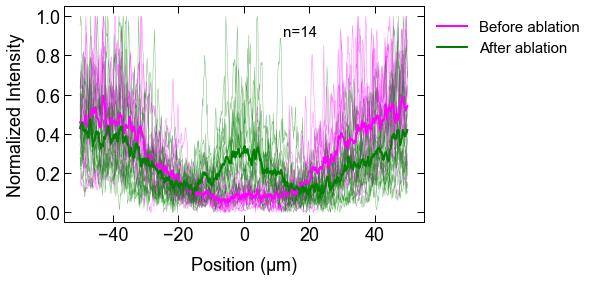

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

from pylab import cm


if increment==6:
    label_first = 'Bazooka'
    label_second = 'Par-1'
    if timepoint==0: title = 'After ablation'
    elif timepoint==3: title= 'Before ablation'
else:
    title= ''
    label_first = 'Before ablation'
    label_second = 'After ablation'

col_first = 'magenta'
col_second = 'green'


# Edit the font, font size, color and axes width
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 1

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(5, 3))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=7, width=1, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=7, width=1, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')


# Add the x and y-axis labels
ax.set_xlabel(r'Position ($\mathregular{\mu}$m)', labelpad=10)
ax.set_ylabel('Normalized Intensity', labelpad=10)

x_axis = np.arange(-range_px, range_px, 1)*px_size

for colname in profile_first_all_normalized:
    ax.plot(x_axis, profile_first_all_normalized[colname], linewidth=0.5, color=col_first, alpha=0.5)

for colname in profile_second_all_normalized:
    ax.plot(x_axis, profile_second_all_normalized[colname], linewidth=0.5, color=col_second, alpha=0.5)


mean_first = profile_first_all_normalized.apply(lambda row : np.mean(row), axis = 1)
ax.plot(x_axis, mean_first, linewidth=2, color=col_first, label=label_first)

mean_second = profile_second_all_normalized.apply(lambda row : np.mean(row), axis = 1)
ax.plot(x_axis, mean_second, linewidth=2, color=col_second, label=label_second)


ax.legend(bbox_to_anchor=(1, 1), loc='upper left', prop={'size': 15}, fancybox=True, framealpha=0.0)

num = len(profile_second_all_normalized.columns)
ax.text(12, 0.9, 'n='+str(num), size=15)

plt.title(title)

In [103]:
fig.savefig('Final_Plot.png', dpi=300, transparent=True, bbox_inches='tight')